In [1]:
import tensorflow as tf

In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# import matplotlib.pylab as plt

import tensorflow_hub as hub
# import tensorflow_datasets as tfds

from tensorflow.keras import layers

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageOps

In [4]:
import logging
logger = tf.get_logger()
logger.setLevel(logging.ERROR)

In [5]:
IMG_SHAPE = 224
BATCH_SIZE = 8
base_dir = "D:\Machine Learning Projects\Thesis\CoconutV10"

In [6]:
import pathlib

coconut_dir = pathlib.Path(base_dir)
coconut_dir

WindowsPath('D:/Machine Learning Projects/Thesis/CoconutV10')

In [35]:
coconut_images_dict = {
    'Butong': list(coconut_dir.glob('Butong/*')),
    'Labogon': list(coconut_dir.glob('Labogon/*')),
    'Lahing': list(coconut_dir.glob('Lahing/*'))
}

coconut_labels_dict = {
    'Butong': 0,
    'Labogon': 1, 
    'Lahing': 2
}
print(coconut_images_dict['Butong'][0])

D:\Machine Learning Projects\Thesis\CoconutV10\Butong\20210602_102003.jpg


In [8]:
print('Butong: ', len(coconut_images_dict['Butong']))
print('Labogon: ', len(coconut_images_dict['Labogon']))
print('Lahing: ', len(coconut_images_dict['Lahing']))

Butong:  160
Labogon:  160
Lahing:  160


In [9]:
X, y = [], []
for coconut_label, coconut_list in coconut_images_dict.items():
    for img in coconut_list:
        #loading the image
        image = tf.keras.preprocessing.image.load_img(img)

        #resizing the image to 224 x 224 pixel using ImageOps
        image = ImageOps.fit(image, (IMG_SHAPE,IMG_SHAPE), Image.ANTIALIAS)

        image_arr = tf.keras.preprocessing.image.img_to_array(image) / 255.0
       
        X.append(image_arr)
        y.append(coconut_labels_dict[coconut_label])

In [40]:
X = np.array(X)
y = np.array(y)

In [11]:
from sklearn.model_selection import train_test_split as tts 
X_train, X_test, y_train, y_test = tts(X, y, train_size=0.8, test_size=0.2)

In [12]:
X_train_scaled = X_train
X_test_scaled = X_test

print(X_train_scaled.shape)
print(X_test_scaled.shape)

(384, 224, 224, 3)
(96, 224, 224, 3)


In [13]:
#Data Augmentation
from tensorflow.keras.preprocessing.image import ImageDataGenerator

data_gen = ImageDataGenerator(
      #degrees
      rotation_range=40,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')
data_gen.fit(X_train_scaled)

In [14]:
URL = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/2"
feature_extractor = hub.KerasLayer(URL,
                                   input_shape=(IMG_SHAPE, IMG_SHAPE,3))

In [15]:
feature_extractor.trainable = False

In [44]:
model = tf.keras.Sequential([
  feature_extractor,
  layers.Dense(3, activation='softmax') # output layer
])

In [45]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1280)              2257984   
                                                                 
 dense_2 (Dense)             (None, 3)                 3843      
                                                                 
Total params: 2,261,827
Trainable params: 3,843
Non-trainable params: 2,257,984
_________________________________________________________________


In [46]:
model.compile(
  optimizer='adam',
  loss=tf.keras.losses.SparseCategoricalCrossentropy(),
  metrics=['accuracy'])

EPOCHS = 15
history = model.fit(X_train_scaled,
                    y_train,
                    epochs=EPOCHS,
                    validation_data = (X_test, y_test),
                    callbacks=tf.keras.callbacks.EarlyStopping(verbose=1, patience=2)
                    )

Epoch 1/15
12/12 [==============================] - 8s 593ms/step - loss: 0.8813 - accuracy: 0.5729 - val_loss: 0.6729 - val_accuracy: 0.6562
Epoch 2/15
12/12 [==============================] - 6s 508ms/step - loss: 0.5503 - accuracy: 0.7708 - val_loss: 0.5425 - val_accuracy: 0.7708
Epoch 3/15
12/12 [==============================] - 6s 531ms/step - loss: 0.4179 - accuracy: 0.8594 - val_loss: 0.4633 - val_accuracy: 0.8021
Epoch 4/15
12/12 [==============================] - 6s 518ms/step - loss: 0.3447 - accuracy: 0.9167 - val_loss: 0.4135 - val_accuracy: 0.8333
Epoch 5/15
12/12 [==============================] - 6s 505ms/step - loss: 0.2892 - accuracy: 0.9271 - val_loss: 0.3857 - val_accuracy: 0.8229
Epoch 6/15
12/12 [==============================] - 6s 513ms/step - loss: 0.2570 - accuracy: 0.9375 - val_loss: 0.3597 - val_accuracy: 0.8646
Epoch 7/15
12/12 [==============================] - 6s 512ms/step - loss: 0.2292 - accuracy: 0.9375 - val_loss: 0.3476 - val_accuracy: 0.8438
Epoch 

In [47]:
model.evaluate(X_test_scaled,y_test)

3/3 [==============================] - 1s 428ms/step - loss: 0.2676 - accuracy: 0.8750


[0.2676013112068176, 0.875]

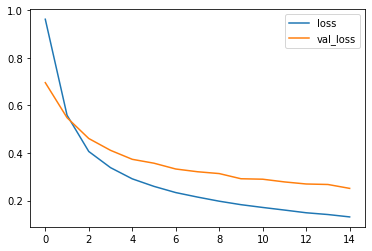

In [28]:
metrics = history.history
plt.plot(history.epoch, metrics['loss'], metrics['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.show()

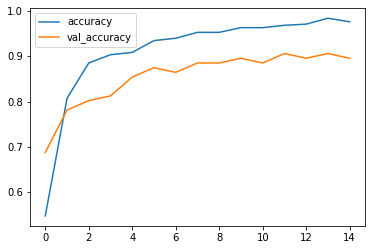

In [29]:
metrics = history.history
plt.plot(history.epoch, metrics['accuracy'], metrics['val_accuracy'])
plt.legend(['accuracy', 'val_accuracy'])
plt.show()

[[0.33014333 0.66260946 0.00724722]]
0.66260946


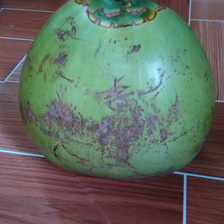

In [54]:
image = tf.keras.preprocessing.image.load_img("D:\Machine Learning Projects\Thesis\Test\pre1.jpg")
image = ImageOps.fit(image, (IMG_SHAPE,IMG_SHAPE), Image.ANTIALIAS)
image_arr = tf.keras.preprocessing.image.img_to_array(image) / 255.0
resized_image = tf.expand_dims(image_arr, 0)

predictions = model.predict(resized_image)
print(predictions)
print(predictions[0][1])
image

## **Export keras model**

## **Export model to tflite**

In [23]:
# Convert the model.
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the model.
with open('./model/coconut_image_augmented.tflite', 'wb') as f:
  f.write(tflite_model)